<h3>Image compression using PCA:</h3>

1. Read image and compute mean and covariance
2. Find Eigenvalues and Eigenvectors
3. Rearrange the Eigenvalues and vectors in decreasing order
4. Select number of PCs to retain
5. Perform forward transform using the retained PCs
6. Reconstruct the compressed image

In [9]:
import os
import numpy as np
from PIL import Image, ImageOps
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

Read and process image:

In [10]:
def read_and_process_image(file_path='sample.png'):
    orig_image = Image.open(file_path)
    orig_image_size = orig_image.size
    orig_image_size_in_kb = os.stat(file_path).st_size / 1024
    orig_image_data = orig_image.getdata()
    np_image_array = np.array(orig_image_data)
    np_image_array = np_image_array.reshape(*orig_image.size, -1)
    image_data_dict = {
        'orig_image': orig_image,
        'orig_image_size': orig_image_size,
        'orig_image_data': orig_image_data,
        'np_image_array': np_image_array,
        'orig_image_size_in_kb': orig_image_size_in_kb
    }
    return image_data_dict

Selected image details:

In [11]:
image_data_dict = read_and_process_image()
print(f"original image size: {image_data_dict['orig_image'].size}")
print(f"original image size in KB: {image_data_dict['orig_image_size_in_kb']} KB")
print(f"Numpy image array shape: {image_data_dict['np_image_array'].shape}")

original image size: (512, 512)
original image size in KB: 575.259765625 KB
Numpy image array shape: (512, 512, 4)


Image visualization:

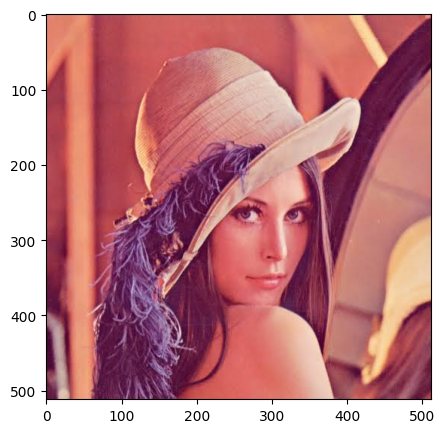

In [12]:
plt.rcParams['figure.figsize'] = (5,5)
plt.imshow(image_data_dict['orig_image'])
plt.show()

Visualization of image channels:

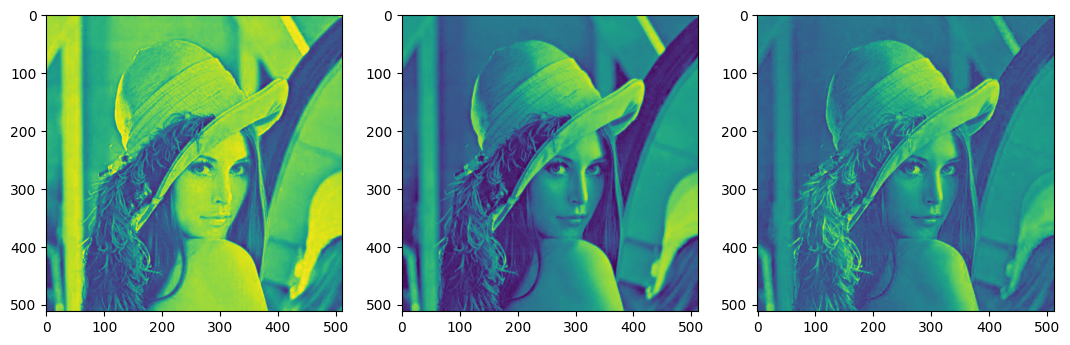

In [13]:
plt.rcParams["figure.figsize"] = (13,13)
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(image_data_dict['np_image_array'][:,:,0])
axarr[1].imshow(image_data_dict['np_image_array'][:,:,1])
axarr[2].imshow(image_data_dict['np_image_array'][:,:,2])

Compute PCA and construct N components:

In [14]:
def compute_pca(np_image_array):
    image_channel_pca = {}
    transposed_image = np.transpose(image_data_dict['np_image_array'])
    
    for i, np_image_2d in enumerate(transposed_image):
        print(f'Computing PCA of channel {i}')
        print(f'Channel shape: {np_image_2d.shape}')
        
        pca = PCA(random_state=42)
        ft = pca.fit_transform(np_image_2d)
        image_channel_pca[i] = (pca, ft)
        print(f'PCA for channel {i} done..\n')

    return image_channel_pca


def reconstruct_n_components(n, image_channel_pca):
    compressed_channels = []
    print(f'Reconstruct {n} components..')
    for channel_index in image_channel_pca.keys():
        pca, ft = image_channel_pca[channel_index]
        pc_pixels = ft[:,:n]
        pc_components = ft[:n,:]
        compressed_channel = np.dot(pc_pixels, pc_components) + pca.mean_
        compressed_channels.append(compressed_channel)

    compressed_channels = np.transpose(compressed_channels)
    compressed_image = np.array(compressed_channels, dtype=np.uint8)
    print('Compression done')
    return compressed_image

In [15]:
image_channel_pca = compute_pca(image_data_dict['np_image_array'])
# image_channel_pca

Computing PCA of channel 0
Channel shape: (512, 512)
PCA for channel 0 done..

Computing PCA of channel 1
Channel shape: (512, 512)
PCA for channel 1 done..

Computing PCA of channel 2
Channel shape: (512, 512)
PCA for channel 2 done..

Computing PCA of channel 3
Channel shape: (512, 512)
PCA for channel 3 done..



c:\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [16]:
n_comp = 2
compressed_image = reconstruct_n_components(n_comp, image_channel_pca)
print(compressed_image.shape)

Reconstruct 2 components..
Compression done
(512, 512, 4)


Display channels of compressed image:

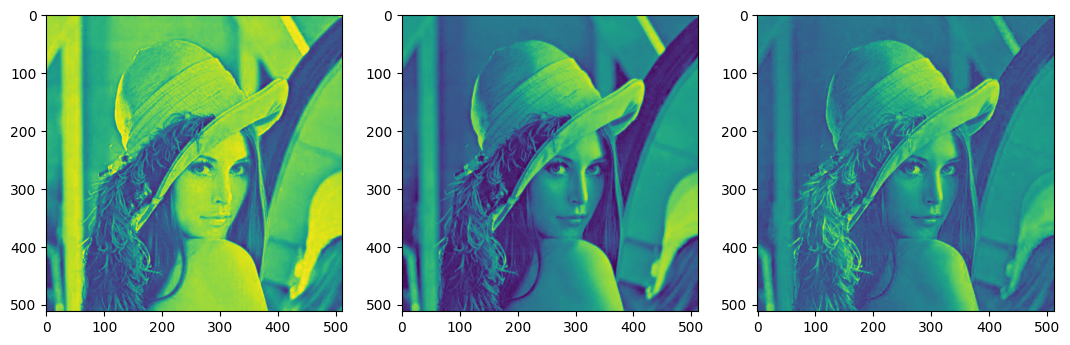

In [17]:
plt.rcParams["figure.figsize"] = (13,13)
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(image_data_dict['np_image_array'][:,:,0])
axarr[1].imshow(image_data_dict['np_image_array'][:,:,1])
axarr[2].imshow(image_data_dict['np_image_array'][:,:,2])

Compressed image after applying PCA:

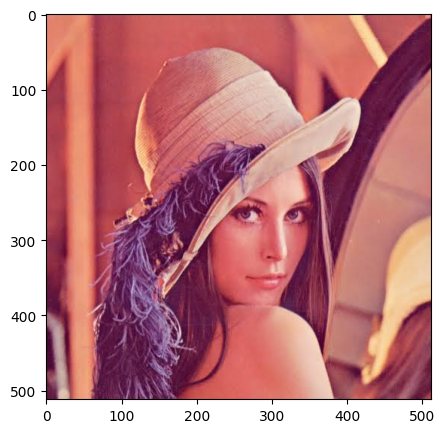

In [18]:
plt.rcParams['figure.figsize'] = (5,5)
plt.imshow(image_data_dict['orig_image'])
plt.show()